In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('howpop_train.csv')

In [3]:

df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/smartsearch/blog/...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [76]:
df.head(15)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,datas
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18,200801
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18,200801
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18,200801
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1,200801
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14,200801
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9.0,2.0,2008,1,3,16,200801
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,0,301,5.0,1.0,2008,1,4,12,200801
7,https://habrahabr.ru/post/18311/,habrahabr.ru,18311,2008-01-03 17:20:00,@Andrey,misc,False,3291,В чем суть проекта Vladelia.ru,64,1,141,17.0,20.0,2008,1,4,17,200801
8,https://habrahabr.ru/post/31352/,habrahabr.ru,31352,2008-01-03 22:54:00,@kvladimir,develop,False,1953,Подтверждено: Wikia Search запускается в понед...,23,2,208,21.0,3.0,2008,1,4,22,200801
9,https://habrahabr.ru/post/18314/,habrahabr.ru,18314,2008-01-03 23:56:00,@lvea,develop,False,3712,Mobile 2.0 Выбор предпочтительного способа связи,6,1,401,2.0,0.0,2008,1,4,23,200801


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 18 columns):
url            134137 non-null object
domain         134137 non-null object
post_id        134137 non-null int64
published      134137 non-null datetime64[ns]
author         97657 non-null object
flow           97048 non-null object
polling        134137 non-null bool
content_len    134137 non-null int64
title          134137 non-null object
comments       134137 non-null int64
favs           134137 non-null int64
views          134137 non-null int64
votes_plus     133566 non-null float64
votes_minus    133566 non-null float64
year           134137 non-null int64
month          134137 non-null int64
dayofweek      134137 non-null int64
hour           134137 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(9), object(5)
memory usage: 15.0+ MB


In [13]:
df['datas']=df['year']*100+df['month']

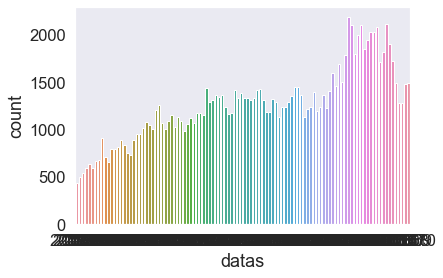

In [22]:
sns.countplot(df['datas']);


In [20]:
pd.crosstab(df['datas'], data['married'])

<bound method Series.max of 0         200801
1         200801
2         200801
3         200801
4         200801
           ...  
134132    201610
134133    201610
134134    201610
134135    201610
134136    201610
Name: datas, Length: 134137, dtype: int64>


In [35]:
from collections import Counter
a=Counter(df['datas'])
print(a)

Counter({201503: 2189, 201603: 2115, 201507: 2111, 201504: 2110, 201512: 2084, 201511: 2035, 201510: 2030, 201506: 2004, 201509: 1944, 201604: 1910, 201508: 1849, 201602: 1819, 201505: 1799, 201502: 1793, 201605: 1726, 201601: 1717, 201412: 1694, 201410: 1595, 201501: 1504, 201606: 1498, 201610: 1493, 201609: 1482, 201411: 1462, 201310: 1456, 201311: 1452, 201106: 1439, 201211: 1435, 201210: 1421, 201203: 1416, 201409: 1408, 201404: 1402, 201205: 1388, 201407: 1372, 201312: 1368, 201111: 1367, 201109: 1363, 201309: 1355, 201110: 1347, 201207: 1340, 201206: 1335, 201209: 1331, 201204: 1330, 201303: 1327, 201208: 1318, 201108: 1315, 201212: 1313, 201304: 1298, 201107: 1292, 201308: 1291, 201607: 1278, 201608: 1278, 201003: 1257, 201306: 1244, 201307: 1244, 201403: 1238, 201406: 1237, 201112: 1235, 201408: 1228, 201402: 1218, 201002: 1203, 201405: 1193, 201301: 1187, 201302: 1186, 201104: 1178, 201202: 1178, 201103: 1172, 201201: 1167, 201105: 1159, 201007: 1152, 201401: 1133, 201009: 112

In [36]:
max(a, key=a.get)

201503

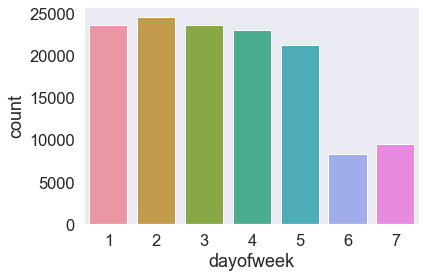

In [46]:
sns.countplot(df['dayofweek']);

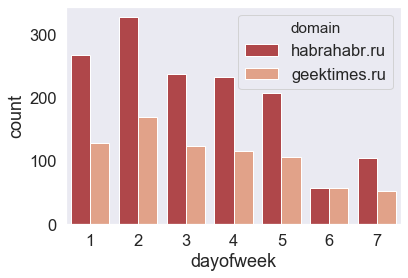

In [51]:
sns.countplot(df[df['datas'] ==201503]['dayofweek'],hue=df['domain']);

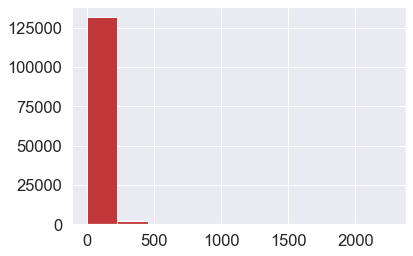

In [63]:

df['comments'].hist();

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 19 columns):
url            134137 non-null object
domain         134137 non-null object
post_id        134137 non-null int64
published      134137 non-null datetime64[ns]
author         97657 non-null object
flow           97048 non-null object
polling        134137 non-null bool
content_len    134137 non-null int64
title          134137 non-null object
comments       134137 non-null int64
favs           134137 non-null int64
views          134137 non-null int64
votes_plus     133566 non-null float64
votes_minus    133566 non-null float64
year           134137 non-null int64
month          134137 non-null int64
dayofweek      134137 non-null int64
hour           134137 non-null int64
datas          134137 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(10), object(5)
memory usage: 16.0+ MB


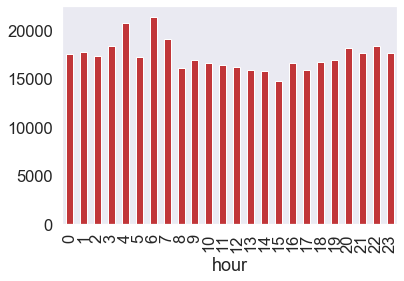

In [75]:
df['views'].groupby(df['hour']).mean().plot(kind='bar');

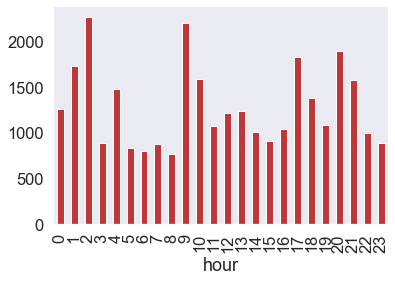

In [90]:
for look, sub_df in df.groupby('domain'):
    df['comments'].groupby(df['hour']).max().plot(kind='bar');